# Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and  importing the functions we will use:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Example: Effect of Holidays on US Births

Let's return to some data we worked with earlier, in [Example: Birthrate Data](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year. We'll start with the same cleaning procedure we used there, and plot the results (see the following figure):

In [ ]:
# shell command to download the data:
# !cd data && curl -O \
#   https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [ ]:
from datetime import datetime

births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

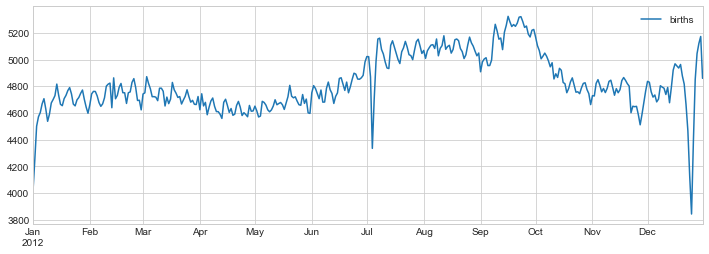

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're visualizing data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the `plt.text`/`ax.text` functions, which will place text at a particular *x*/*y* value (see the following figure):

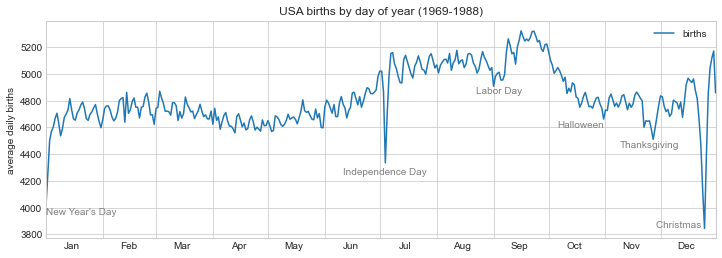

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The `ax.text` method takes an *x* position, a *y* position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used `ha='right'` and `ha='center'`, where `ha` is short for *horizontal alignment*.
See the docstrings of `plt.text` and `mpl.text.Text` for more information on the available options.

## Transforms and Text Position

In the previous example, we anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a fixed position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.

Matplotlib makes use of a few different coordinate systems: a data point at $(x, y) = (1, 1)$ corresponds to a certain location on the axes or figure, which in turn corresponds to a particular pixel on the screen.
Mathematically, transforming between such coordinate systems is relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform these transforms (these tools can be explored in the `matplotlib.transforms` submodule).

A typical user rarely needs to worry about the details of the transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three predefined transforms that can be useful in this situation:

- `ax.transData`: Transform associated with data coordinates
- `ax.transAxes`: Transform associated with the axes (in units of axes dimensions)
- `fig.transFigure`: Transform associated with the figure (in units of figure dimensions)

Let's look at an example of drawing text at various locations using these transforms (see the following figure):

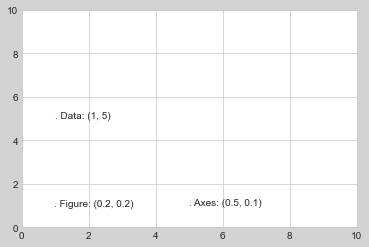

In [ ]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Matplotlib's default text alignment is such that the "." at the beginning of each string will approximately mark the specified coordinate location.

The `transData` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The `transAxes` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the total axes size.
The `transFigure` coordinates are similar, but specify the position from the bottom-left corner of the figure (here the gray box) as a fraction of the total figure size.

Notice now that if we change the axes limits, it is only the `transData` coordinates that will be affected, while the others remain stationary (see the following figure):

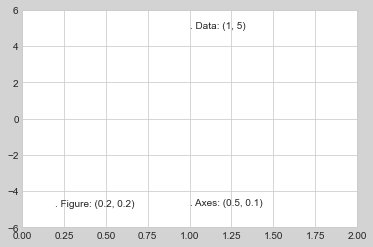

In [ ]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

This behavior can be seen more clearly by changing the axes limits interactively: if you are executing this code in a notebook, you can make that happen by changing `%matplotlib inline` to `%matplotlib notebook` and using each plot's menu to interact with the plot.

## Arrows and Annotation

Along with tickmarks and text, another useful annotation mark is the simple arrow.

While there is a `plt.arrow` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, making it tricky to get them right.
Instead, I'd suggest using the `plt.annotate` function, which creates some text and an arrow and allows the arrows to be very flexibly specified.

Here is a demonstration of `annotate` with several of its options (see the following figure):

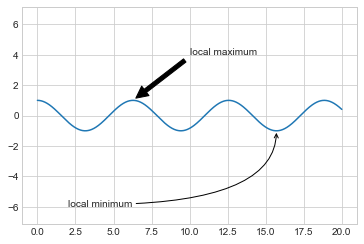

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the `arrowprops` dictionary, which has numerous options available.
These options are well documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to show some examples.
Let's demonstrate several of the possible options using the birthrate plot from before (see the following figure):

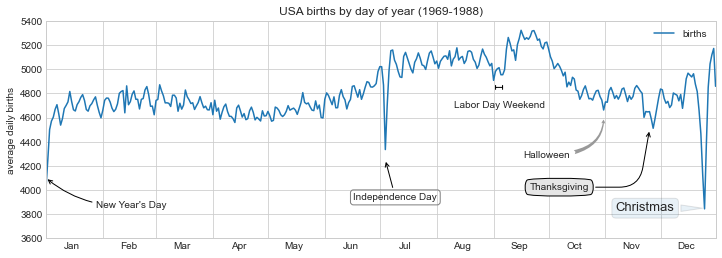

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day Weekend', xy=('2012-9-4', 4850), xycoords='data',
            ha='center', xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

The variety of options make `annotate` powerful and flexible: you can create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time-consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather is included as a demonstration of some of the available options.

More discussion and examples of available arrow and annotation styles can be found in the Matplotlib [Annotations tutorial](https://matplotlib.org/stable/tutorials/text/annotations.html).

# Customizing Ticks

Matplotlib's default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This chapter will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Before we go into examples, however, let's talk a bit more about the object hierarchy of Matplotlib plots.
Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the `Figure` is the bounding box within which plot elements appear.
Each Matplotlib object can also act as a container of subobjects: for example, each `Figure` can contain one or more `Axes` objects, each of which in turn contains other objects representing plot contents.

The tickmarks are no exception. Each axes has attributes `xaxis` and `yaxis`, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

## Major and Minor Ticks

Within each axes, there is the concept of a *major* tickmark, and a *minor* tickmark. As the names imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots (see the following figure):

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

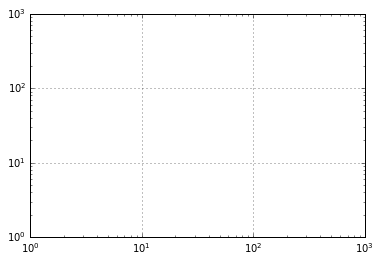

In [ ]:
ax = plt.axes(xscale='log', yscale='log')
ax.set(xlim=(1, 1E3), ylim=(1, 1E3))
ax.grid(True);

In this chart each major tick shows a large tickmark, label, and gridline, while each minor tick shows a smaller tickmark with no label or gridline.

These tick properties—locations and labels, that is—can be customized by setting the `formatter` and `locator` objects of each axis. Let's examine these for the x-axis of the just-shown plot:

In [ ]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [ ]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We see that both major and minor tick labels have their locations specified by a `LogLocator` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a `NullFormatter`: this says that no labels will be shown.

We'll now look at a few examples of setting these locators and formatters for various plots.

## Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using `plt.NullLocator` and `plt.NullFormatter`, as shown here (see the following figure):

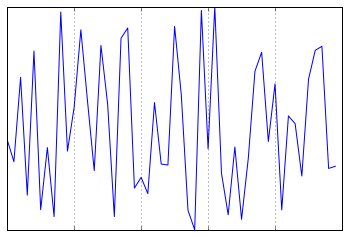

In [ ]:
ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

We've removed the labels (but kept the ticks/gridlines) from the x-axis, and removed the ticks (and thus the labels and gridlines as well) from the y-axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems (see, for example, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

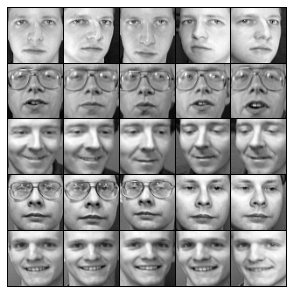

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from Scikit-Learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='binary_r')

Each image is shown in its own axes, and we've set the tick locators to null because the tick values (pixel numbers in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here (see the following figure):

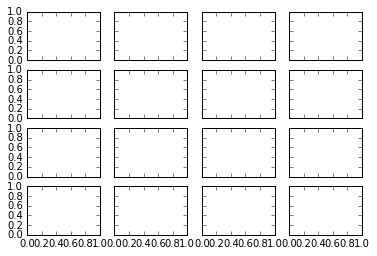

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularly for the x-axis ticks, the numbers nearly overlap, making them quite difficult to decipher.
One way to adjust this is with `plt.MaxNLocator`, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations (see the following figure):

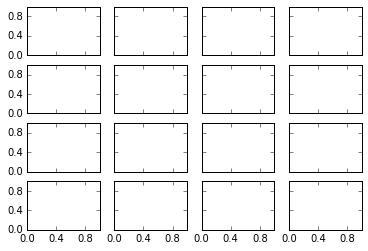

In [ ]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

This makes things much cleaner. If you want even more control over the locations of regularly spaced ticks, you might also use `plt.MultipleLocator`, which we'll discuss in the following section.

## Fancy Tick Formats

Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like to do something different.
Consider this plot of a sine and a cosine curve (see the following figure):

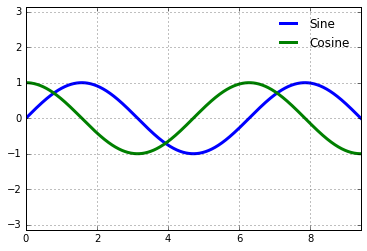

In [ ]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple of changes we might like to make here. First, it's more natural for this data to space the ticks and gridlines in multiples of $\pi$. We can do this by setting a `MultipleLocator`, which locates ticks at a multiple of the number we provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/2$ and $\pi/4$ (see the following figure):

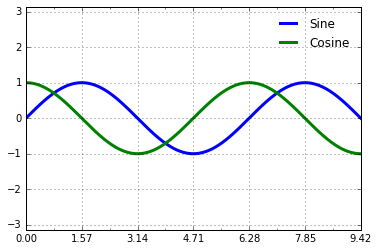

In [ ]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use `plt.FuncFormatter`, which accepts a user-defined function giving fine-grained control over the tick outputs (see the following figure):

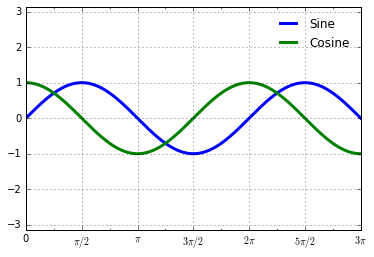

In [ ]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N // 2}\pi$"

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, `"$\pi$"` is rendered as the Greek character $\pi$.

## Summary of Formatters and Locators

We've seen a couple of the available formatters and locators; I'll conclude this chapter by briefly listing all of the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentation.
Each of the following is available in the `plt` namespace:

Locator class      | Description
-------------------|-------------
`NullLocator`      | No ticks
`FixedLocator`     | Tick locations are fixed
`IndexLocator`     | Locator for index plots (e.g., where `x = range(len(y)))`
`LinearLocator`    | Evenly spaced ticks from min to max
`LogLocator`       | Logarithmically spaced ticks from min to max
`MultipleLocator`  | Ticks and range are a multiple of base
`MaxNLocator`      | Finds up to a max number of ticks at nice locations
`AutoLocator`      | (Default) `MaxNLocator` with simple defaults
`AutoMinorLocator` | Locator for minor ticks

Formatter class     | Description
--------------------|---------------
`NullFormatter`     | No labels on the ticks
`IndexFormatter`    | Set the strings from a list of labels
`FixedFormatter`    | Set the strings manually for the labels
`FuncFormatter`     | User-defined function sets the labels
`FormatStrFormatter`| Use a format string for each value
`ScalarFormatter`   | Default formatter for scalar values
`LogFormatter`      | Default formatter for log axes

We'll see further examples of these throughout the remainder of the book.

# Customizing Matplotlib: Configurations and Stylesheets

While many of the topics covered in previous chapters involve adjusting the style of plot elements one by one, Matplotlib also offers mechanisms to adjust the overall style of a chart all at once. In this chapter we'll walk through some of Matplotlib's runtime configuration (*rc*) options, and take a look at the *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Throughout this part of the book, you've seen how it is possible to tweak individual plot settings to end up with something that looks a little nicer than the default.
It's also possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram, shown in the following figure:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

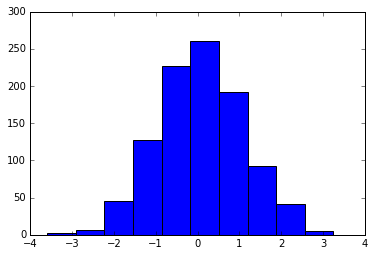

In [ ]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot, as you can see in the following figure:

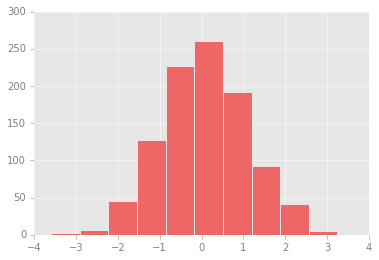

In [ ]:
# use a gray background
fig = plt.figure(facecolor='white')
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white gridlines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by that of the R language's `ggplot` visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the `plt.rc` convenience routine.
Let's see how we can modify the rc parameters so that our default plot will look similar to what we did before.

We can use the `plt.rc` function to change some of these settings:

In [ ]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='white')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action (see the following figure):

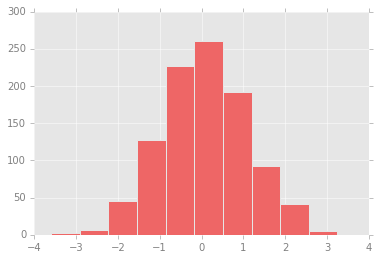

In [ ]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters (see the following figure):

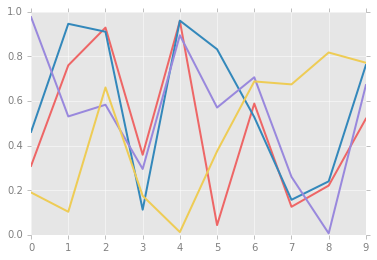

In [ ]:
for i in range(4):
    plt.plot(np.random.rand(10))

For charts viewed onscreen rather than printed, I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
Optionally, these settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

## Stylesheets

A newer mechanism for adjusting overall chart styles is via Matplotlib's `style` module, which includes a number of default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't go as far as creating your own style, you may find what you're looking for in the built-in stylesheets.
`plt.style.available` contains a list of the available styles—here I'll list only the first five for brevity:

In [ ]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

The standard way to switch to a stylesheet is to call `style.use`:

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the Python session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


To demonstrate these styles, let's create a function that will make two basic types of plot:

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default Style

Matplotlib's `default` style was updated in the version 2.0 release; let's look at this first (see the following figure):

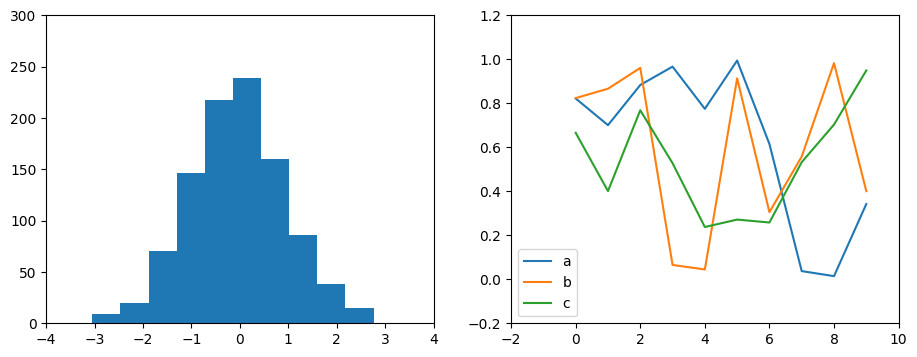

In [ ]:
with plt.style.context('default'):
    hist_and_lines()

### FiveThiryEight Style

The `fivethirtyeight` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see in the following figure, it is typified by bold colors, thick lines, and transparent axes:

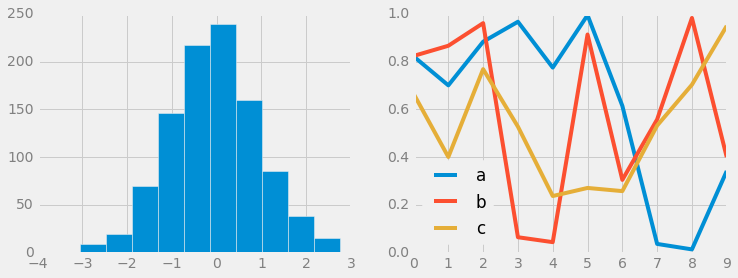

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot Style

The `ggplot` package in the R language is a popular visualization tool among data scientists.
Matplotlib's `ggplot` style mimics the default styles from that package (see the following figure):

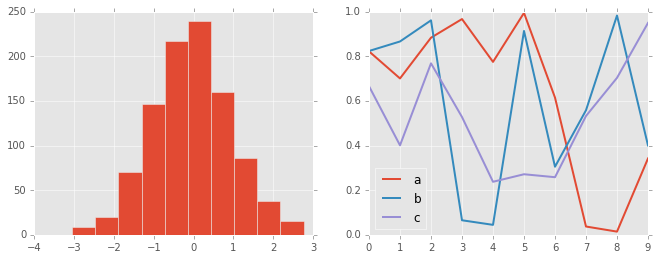

In [ ]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers Style

There is a neat short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) by Cameron Davidson-Pilon that features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet (see the following figure):

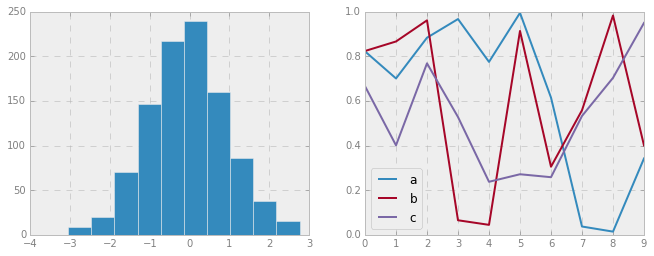

In [ ]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark Background Style

For figures used within presentations, it is often useful to have a dark rather than light background.
The `dark_background` style provides this (see the following figure):

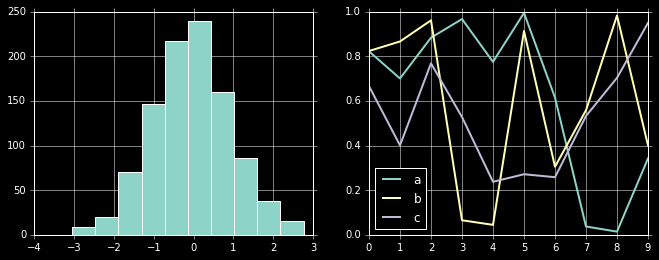

In [ ]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale Style

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the `grayscale` style (see the following figure) can be useful:

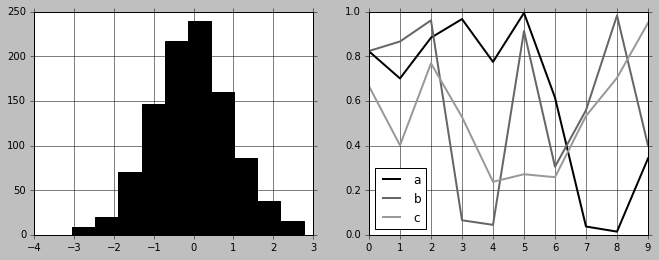

In [ ]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn Style

Matplotlib also has several stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration (see the following figure):

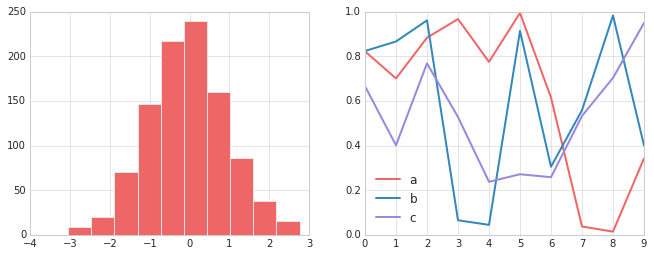

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    hist_and_lines()

Take some time to explore the built-in options and find one that appeals to you!
Throughout this book, I will generally use one or more of these style conventions when creating plots.